In [11]:
import cmath
import numpy as np
# from mayavi import mlab
from pylab import *
import matplotlib.colors as mcolors

from matplotlib import pyplot as plt

In [2]:
# 定义需要函数
def func_t(x, f1re, f2re, kre, Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*np.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    t_up = (W_3*2*np.cos(2*yita) - (W_1)-(W_2))*Tao1
    t_down = W_2 * W_1 - (W_3)**2
    ft = t_up / t_down + 1
    return abs(ft)

In [3]:
def func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*np.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    r_up = (W_3*(-2) + (W_1)*np.exp(-2j*yita) + (W_2)*np.exp(2j*yita))*Tao1
    r_down = W_2 * W_1 - (W_3)**2
    fr = r_up /r_down
    return abs(fr)

In [4]:
def func_A(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    r = func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)
    t = func_t(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita)
    A = 1 - t*t - r*r
    return A

In [5]:
def f_para_c2f(L, C, x):
    return (L*(C+x))**(-1/2)

In [6]:
xi = np.linspace(0.4, 2.2, 100)
yi = np.linspace(0.4, 2.2, 100)
c1,c2 = np.meshgrid(xi,yi)

L1, C1 = 0.01049, 3.973
L2, C2 = 0.01659, 1.529
f1 = f_para_c2f(L1, C1, c1)
f2 = f_para_c2f(L2, C2, c2)
# 还需要其他参数 和 c电容 的关系！


In [7]:
d = 2.811 + 0.1935*c1 + (-2.188)*c2
yita = 1.043 + 0.144*c1 + 0.7008*c2
k = 0.1959 + 0.1916*c1 + (-0.005961)*c2
T1 = 0.0362 + (-0.01778)*c1 + 0.02358*c2
T2 = 0.04774 + 0.01221*c1 + (-0.007754)*c2

In [8]:
f = 4.72 # 工作频率 （GHz)
# z = func_r(f, f1, f2, 0.56, 0.05, 0.05, 1.57, 1.52) # 先用固定参数画一下
z = func_t(f, f1, f2, k, T1, T2, d, yita)

In [12]:
# mayavi
pl = mlab.surf(c1, c2, z, warp_scale=2)
mlab.axes(xlabel="c1", ylabel="c2", zlabel="z")
mlab.outline(pl)
mlab.show()

AttributeError: module 'matplotlib.mlab' has no attribute 'surf'

In [52]:
colors=["magenta","blueviolet","royalblue","aqua","springgreen","greenyellow","yellow","orangered","red","white"]
clrmap=mcolors.LinearSegmentedColormap.from_list("mycmap",colors)

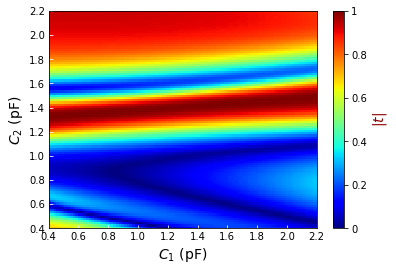

In [12]:
# pcolor
cmap = cm.get_cmap("jet") #rainbow
norm = mcolors.Normalize(vmin=0, vmax=1)

# fig = plt.figure(figsize=(6,4))
pcolor(c1,c2,z,cmap = cmap, norm = norm)
#x和y是网格,z是(x,y)坐标处的颜色值
cb = plt.colorbar()
ax = plt.gca()
ax.set_xlabel("$C_1$ (pF)",fontsize=14)
ax.set_ylabel("$C_2$ (pF)",fontsize=14)

x_major_locator=plt.MultipleLocator(0.2)
y_major_locator=plt.MultipleLocator(0.2)

ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.xlim(0.4,2.2)
plt.ylim(0.4,2.2)

plt.tick_params(axis='both',which='major',labelsize=10,direction='in',color='white') #设置刻度的字号
# ax.set_xticks([0.4, 0.8, 1.2, 1.6, 0, 25, 50, 75, 2.2])
# ax.set_yticks([-100, -75, -50, -25, 25, 50, 75, 100])
# plt.savefig('output.jpg')
#------------------------------
cb.ax.tick_params(labelsize=10)  #设置色标刻度字体大小。

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 14,
        }
cb.set_label('$|t|$',fontdict=font) #设置colorbar的标签字体及其大小
cb.set_ticks(np.linspace(0,1,6))
cb.set_ticklabels(('0', '0.2', '0.4', '0.6', '0.8',  '1'))
plt.show()